In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

True

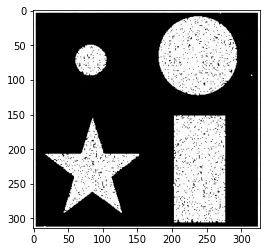

In [ ]:
ig=cv.imread('/content/openclose.jpg')
kernel=np.ones((2,2),np.uint8)
opening=cv.morphologyEx(ig,cv.MORPH_OPEN,kernel,iterations=1)
plt.imshow(opening)
cv.imwrite('m.png',opening)

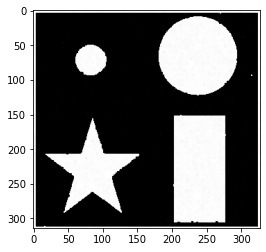

In [ ]:
ig=cv.imread('/content/m.png')
kernel=np.ones((3,3),np.uint8)
closing=cv.morphologyEx(ig,cv.MORPH_CLOSE,kernel,iterations=1)
plt.imshow(closing)

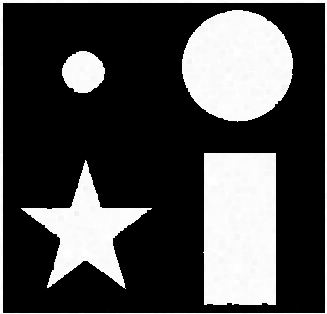

In [ ]:
img_erosion = cv.erode(closing, kernel, iterations=1)

cv2_imshow(img_erosion)

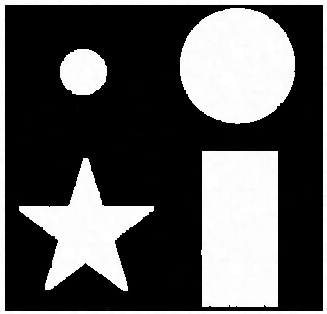

In [ ]:
img_dilation = cv.dilate(img_erosion, kernel, iterations=2)
cv2_imshow( img_dilation)

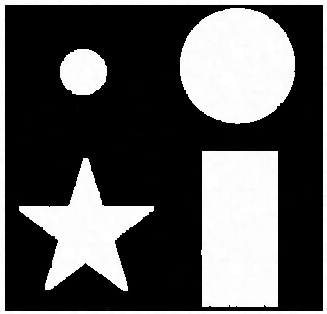

In [ ]:
#Set up the detector with default parameters.
ig=cv.bitwise_not(img_dilation)

params = cv.SimpleBlobDetector_Params()
detector = cv.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(ig)
ig=cv.bitwise_not(ig)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the
#circle corresponds to the size of blob
ig_with_keypoints = cv.drawKeypoints(ig, keypoints, np.array([]), 
    (0,0,255),cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show keypoints
cv2_imshow(ig)

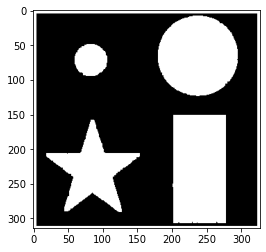

In [ ]:
image = cv.cvtColor(ig, cv.COLOR_BGR2RGB)
# convert to grayscale
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv.threshold(gray, 225, 255, cv.THRESH_BINARY_INV)
# show it
plt.imshow(~binary, cmap="gray")
plt.show()

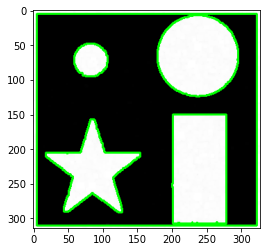

In [ ]:
# find the contours from the thresholded image
contours, hierarchy = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# draw all contours
img = cv.drawContours(ig, contours, -1, (0, 255, 0), 2)
# show the image with the drawn contours
plt.imshow(img)
plt.show()

In [ ]:
print(len(contours))

5


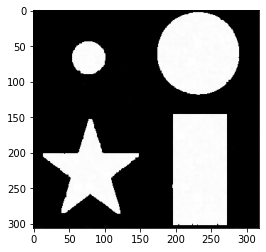

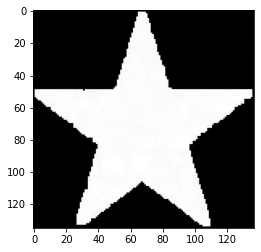

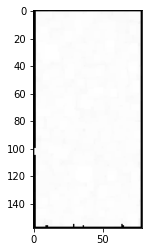

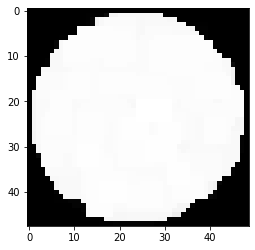

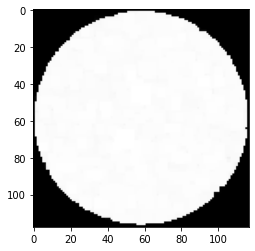

In [ ]:
for i in range(len(contours)):
  x,y,w,h = cv.boundingRect(contours[0+i])
  ROI = image[y:y+h, x:x+w]
  plt.imshow(ROI)
  plt.show()

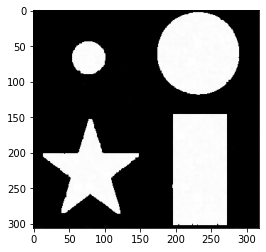

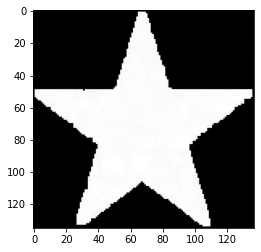

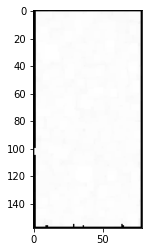

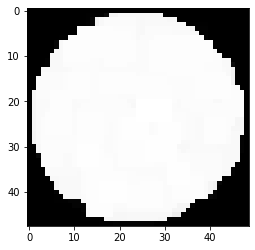

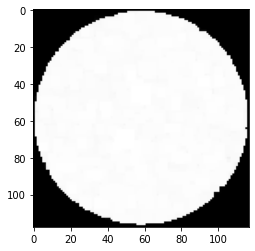

In [ ]:
x,y,w,h = cv.boundingRect(contours[0])
ROI = image[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()
x,y,w,h = cv.boundingRect(contours[1])
ROI = image[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()
x,y,w,h = cv.boundingRect(contours[2])
ROI = image[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()
x,y,w,h = cv.boundingRect(contours[3])
ROI = image[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()
x,y,w,h = cv.boundingRect(contours[4])
ROI = image[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()
